In [ ]:
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from keras.models import Sequential
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras import layers
import tensorflow_hub as hub
from sklearn.metrics import classification_report

In [ ]:
(training_set, test_set), info = tfds.load(
    'tf_flowers',
    data_dir = './',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)
print("Training Set Size: %d" % training_set.cardinality().numpy())
print("Test Set Size: %d" % test_set.cardinality().numpy())

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ./tf_flowers/3.0.1. Subsequent calls will reuse this data.
Training Set Size: 2936
Test Set Size: 734


In [ ]:
IMG_SIZE = 224
  
def format_image(image, label):
  
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
      
    # Normalisation
    image = image/255.0
    return image, label
  
batch_size = 32
training_set = training_set.shuffle(300).map(format_image).batch(batch_size).prefetch(1)
test_set = test_set.map(format_image).batch(batch_size).prefetch(1)

In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
def getModel():
  model = Sequential()
  # pretrained_model= tf.keras.applications.xception.Xception(include_top=False,
  #                  input_shape=(224, 224, 3),
  #                  weights='imagenet')
  # for layer in pretrained_model.layers:
  #     layer.trainable=False
  model.add(data_augmentation)
  # model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(5, activation='softmax'))  
  model.summary()

  return model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 256)               38535424  
                                                                 
 dense_15 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 38,536,709
Trainable params: 38,536,709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
92/92 [==============================] - 11s 84ms/step - loss: 21.6085 - accuracy: 0.3266 - val_loss: 4.5197 - val_accuracy: 0.3161
Epoch 2/15
92/92 [=============

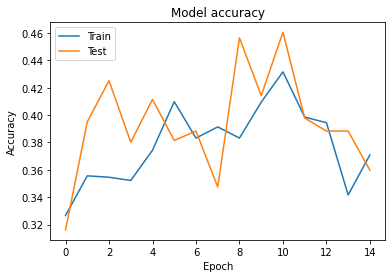

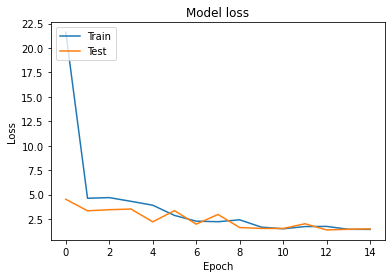

In [ ]:
model = getModel()
  
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')
  
epochs = 15
history = model.fit(training_set, epochs=epochs, 
          validation_data=test_set)

# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
res = model.evaluate(test_set)
for (name, value) in zip(model.metrics_names, res):
    print(name, value) 

img, labl = next(iter(test_set))
print(classification_report(labl, np.argmax(model.predict(img), axis=1)))

23/23 [==============================] - 3s 130ms/step - loss: 0.4180 - accuracy: 0.8937
loss 0.41804012656211853
accuracy 0.8937329649925232
1/1 [==============================] - 1s 654ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      0.82      0.90        11
           3       1.00      0.86      0.92         7
           4       0.67      1.00      0.80         4

    accuracy                           0.91        32
   macro avg       0.90      0.94      0.91        32
weighted avg       0.93      0.91      0.91        32

